<h1>DRV Analysis</h1>

In [1]:
from properties import vwl_hold, vbl_hold, vblneg_hold, vwl_read, vbl_read, vblneg_read
from properties import vdd_standard, vdd_seevinck, vdd_gaussian_vth
from properties import vsweep_standard, vsweep_seevinck, vsweep_gaussian_vth
from properties import i_leak_n, i_leak_p
from properties import dc_vsweep_gaussian_vth
from properties import rit_models, dc_vsweep_standard, w_ax_step_param_standard, save_w_ax_standard, dc_vsweep_seevinck, snm_max, snm_min, w_ax_step_param_seevinck, save_w_ax_seevinck, rit_models_montecarlo, dc_vsweep_gaussian_vth, step_param_run_gaussian_vth, tran_gaussian_vth
from utils.path import ltspice, schematics, images
from utils.patterns import w_ax_standard_pattern, w_ax_seevinck_pattern, snm_max_seevinck_pattern, snm_min_seevinck_pattern, i_leak_n_pattern, i_leak_p_pattern
from models.snm import graphical_processing, rotate_points, seevinck_processing
from models.ops import save_image, get_data, __init_model__, CircuitType, OperationType
from matplotlib import pyplot as plt
import os
from statistics import mean, stdev
from IPython.display import Image, display
import numpy as np

In [2]:
# w_ax pick
w_ax_pos = 1

<h2>SNM Standard Analysis</h2>

<h3>Hold Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/standard/hold/standard_hold.asc
Successful/Total Simulations: 0/1
Raw file: data\standard\hold\standard_hold_1.raw, Log file: data\standard\hold\standard_hold_1.log
File opened successfully: data\standard\hold\standard_hold_1.raw
File updated successfully: ../../images/standard_hold_simulation.png


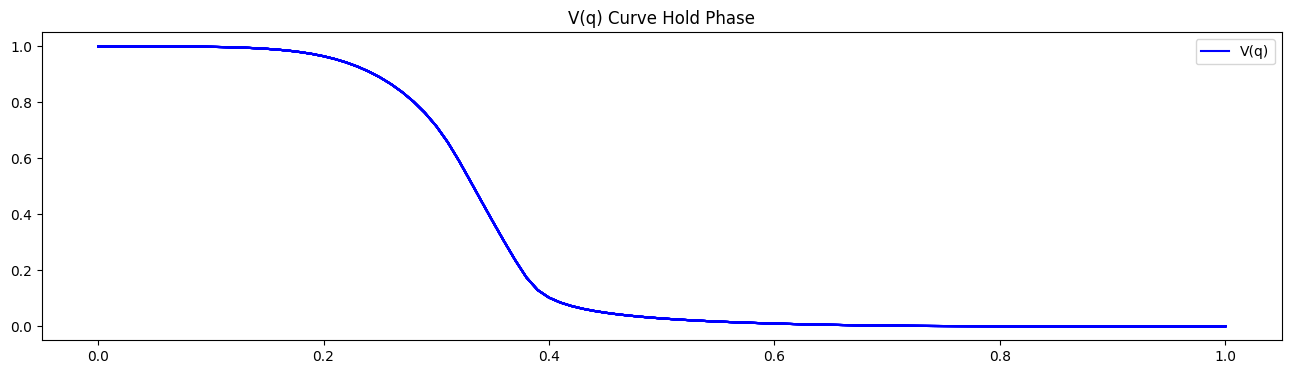

In [3]:
steps, vsweep_standard_hold, i_leaks_standard_hold, v_q_standard_hold, v_q_neg_standard_hold, standard_hold_log = __init_model__(
    operation_type=OperationType.HOLD,
    circuit_type=CircuitType.STANDARD, 
    asc_file_path=os.path.join(ltspice, "standard/hold/standard_hold.asc"),
    schematic_image_path=os.path.join(schematics, "standard.png"),
    vdd=vdd_standard,
    vsweep=vsweep_standard,
    vwl=vwl_hold,
    vbl=vbl_hold,
    vblneg=vblneg_hold,
    params=[rit_models, dc_vsweep_standard, w_ax_step_param_standard, save_w_ax_standard]
)

plt.figure(figsize=(16, 4))
for step in range(len(steps)):
    x = vsweep_standard_hold.get_wave(step)
    vq = v_q_standard_hold.get_wave(step)
    plt.plot(x, vq, label=steps[step], color='blue')
plt.title("V(q) Curve Hold Phase")
plt.legend(["V(q)"])
save_image(image_path=os.path.join(images, "standard_hold_simulation.png"), plt=plt)
plt.show()

w_ax_standard_hold = [1.2e-07, 1.3e-07, 1.4e-07, 1.5e-07, 1.6e-07, 1.7e-07, 1.8e-07, 1.9e-07, 2e-07, 2.1e-07, 2.2e-07, 2.3e-07, 2.4e-07]


Text(0.5, 1.0, 'W AX Trend Hold Phase')

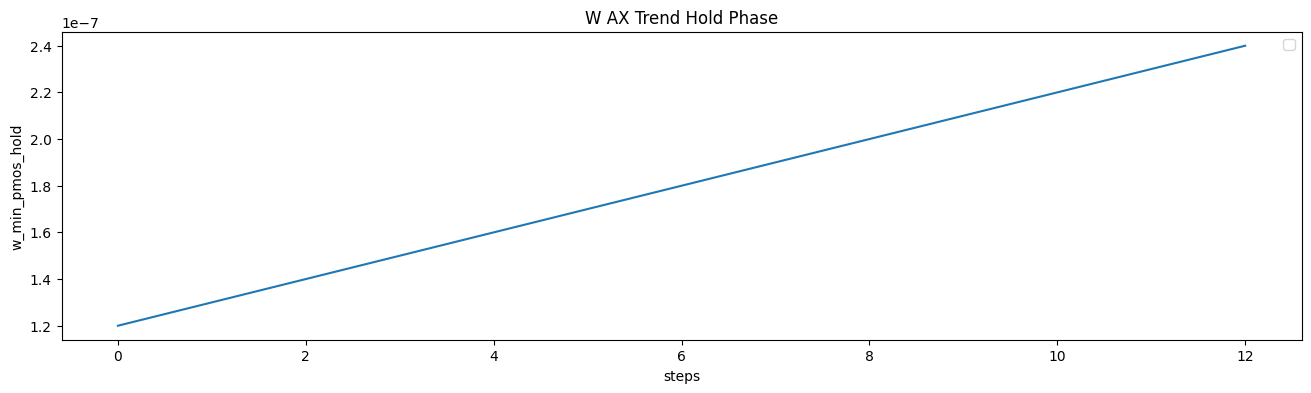

In [4]:
standard_hold_log_file_path = f"./{standard_hold_log}"

with open(standard_hold_log_file_path, "r") as file:
    content = file.read()

w_ax_standard_hold = get_data(pattern=w_ax_standard_pattern, content=content)
print(f'w_ax_standard_hold = {w_ax_standard_hold}')

plt.figure(figsize=(16, 4))
plt.legend(['w_ax_standard_hold'])
plt.plot(w_ax_standard_hold, label='w_ax_standard_hold')
plt.ylabel('w_min_pmos_hold'); plt.xlabel('steps'); plt.title('W AX Trend Hold Phase')

snm_standard_hold[w_ax_pos=1.3e-07 u] = 262.43550473079256
File updated successfully: ../../images/butterfly_curve_standard_hold.png


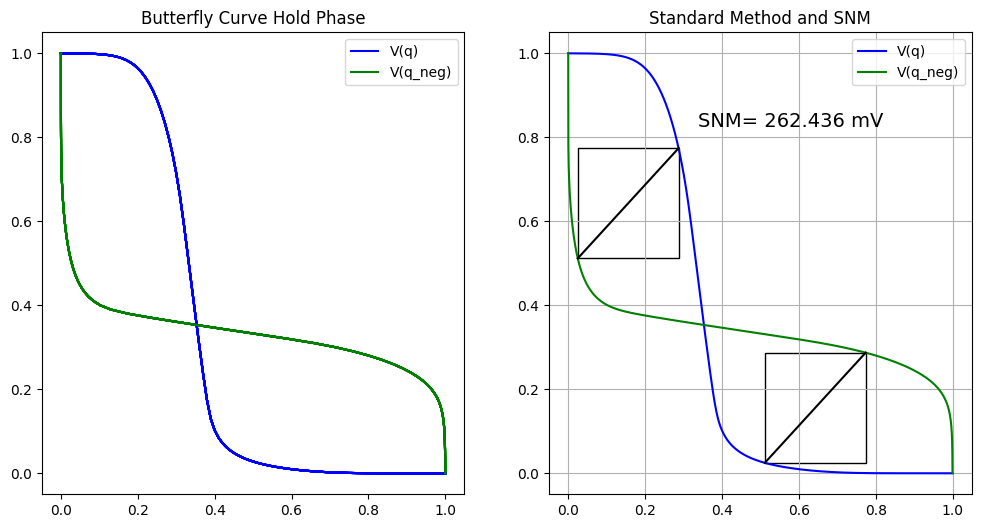

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
x_vq_standard_hold = []
vq_standard_hold = []
x_vqneg_standard_hold = [] 
vqneg_standard_hold = []
for step in range(len(steps)):
    x = vsweep_standard_hold.get_wave(step)
    vq = v_q_standard_hold.get_wave(step)
    x_vq_standard_hold.append(x)
    vq_standard_hold.append(vq)
    x_vqneg_standard_hold.append(vq)
    vqneg_standard_hold.append(x)
    axs[0].plot(x, vq, label=steps[step], color='blue')
    axs[0].plot(vq, x, label=steps[step], color='green')
axs[0].set_title("Butterfly Curve Hold Phase")
axs[0].legend(["V(q)", "V(q_neg)"])

# graphical method
snm_standard_hold = graphical_processing(
    x_vq=x_vq_standard_hold[w_ax_pos], 
    vq=vq_standard_hold[w_ax_pos], 
    x_vqneg=x_vqneg_standard_hold[w_ax_pos], 
    vqneg=vqneg_standard_hold[w_ax_pos], ax=axs[1]
)
print(f'snm_standard_hold[w_ax_pos={w_ax_standard_hold[w_ax_pos]} u] = {snm_standard_hold}')

save_image(image_path=os.path.join(images, "butterfly_curve_standard_hold.png"), plt=plt)
plt.show()

<h3>Read Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/standard/read/standard_read.asc
Successful/Total Simulations: 0/1
Raw file: data\standard\read\standard_read_1.raw, Log file: data\standard\read\standard_read_1.log
File opened successfully: data\standard\read\standard_read_1.raw
File updated successfully: ../../images/standard_read_simulation.png


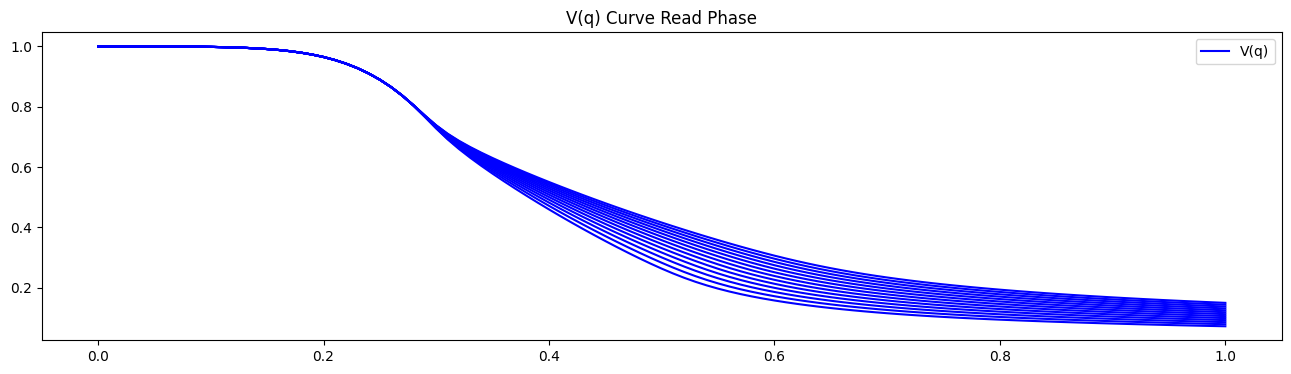

In [6]:
steps, vsweep_standard_read, i_leaks_standard_read, v_q_standard_read, v_q_neg_standard_read, standard_read_log = __init_model__(
    operation_type=OperationType.READ,
    circuit_type=CircuitType.STANDARD, 
    asc_file_path=os.path.join(ltspice, "standard/read/standard_read.asc"),
    schematic_image_path=os.path.join(schematics, "standard.png"),
    vdd=vdd_standard,
    vsweep=vsweep_standard,
    vwl=vwl_read,
    vbl=vbl_read,
    vblneg=vblneg_read,
    params=[rit_models, dc_vsweep_standard, w_ax_step_param_standard, save_w_ax_standard]
)

plt.figure(figsize=(16, 4))
for step in range(len(steps)):
    x = vsweep_standard_read.get_wave(step)
    vq = v_q_standard_read.get_wave(step)
    plt.plot(x, vq, label=steps[step], color='blue')
plt.title("V(q) Curve Read Phase")
plt.legend(["V(q)"])
save_image(image_path=os.path.join(images, "standard_read_simulation.png"), plt=plt)
plt.show()

w_ax_standard_read = [1.2e-07, 1.3e-07, 1.4e-07, 1.5e-07, 1.6e-07, 1.7e-07, 1.8e-07, 1.9e-07, 2e-07, 2.1e-07, 2.2e-07, 2.3e-07, 2.4e-07]


Text(0.5, 1.0, 'W AX Trend Read Phase')

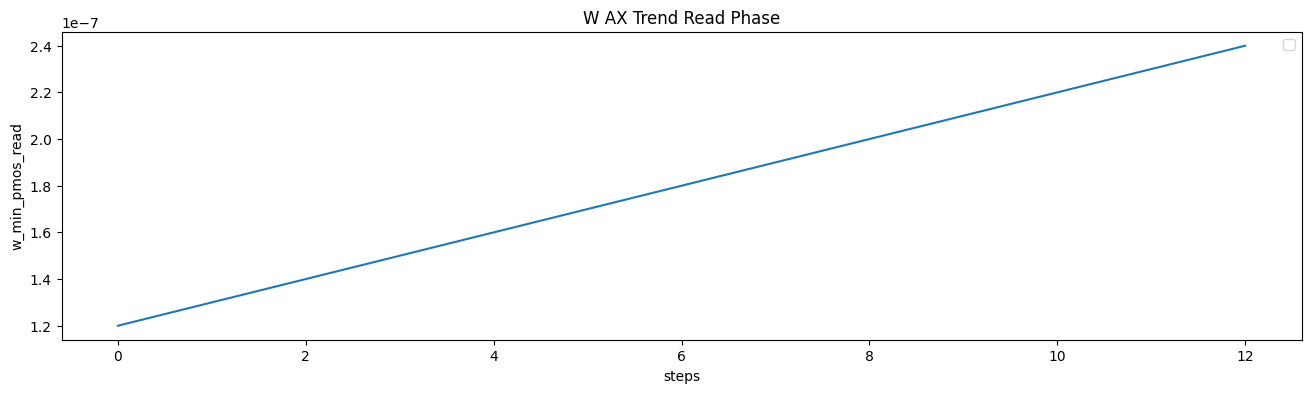

In [7]:
standard_read_log_file_path = f"./{standard_read_log}"

with open(standard_read_log_file_path, "r") as file:
    content = file.read()

w_ax_standard_read = get_data(pattern=w_ax_standard_pattern, content=content)
print(f'w_ax_standard_read = {w_ax_standard_read}')

plt.figure(figsize=(16, 4))
plt.legend(['w_ax_standard_read'])
plt.plot(w_ax_standard_read, label='w_ax_standard_read')
plt.ylabel('w_min_pmos_read'); plt.xlabel('steps'); plt.title('W AX Trend Read Phase')

snm_standard_read[w_ax_pos=1.3e-07 u] = 141.84301463106343
File updated successfully: ../../images/butterfly_curve_standard_read.png


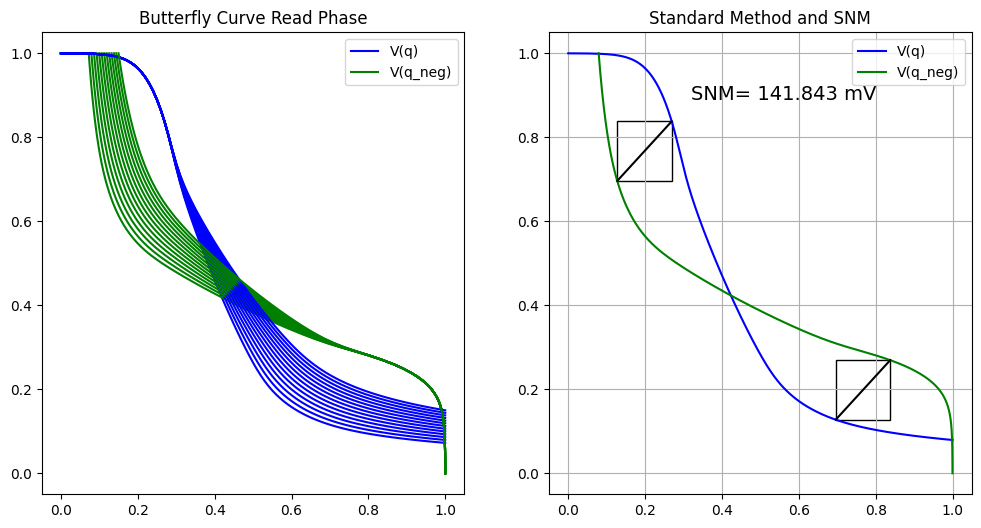

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
x_vq_standard_read = []
vq_standard_read = []
x_vqneg_standard_read = []
vqneg_standard_read = []
for step in range(len(steps)):
    x = vsweep_standard_read.get_wave(step)
    vq = v_q_standard_read.get_wave(step)
    x_vq_standard_read.append(x)
    vq_standard_read.append(vq)
    x_vqneg_standard_read.append(vq)
    vqneg_standard_read.append(x)
    axs[0].plot(vsweep_standard_read.get_wave(step), v_q_standard_read.get_wave(step), label=steps[step], color='blue')
    axs[0].plot(v_q_standard_read.get_wave(step), vsweep_standard_read.get_wave(step), label=steps[step], color='green')
axs[0].set_title("Butterfly Curve Read Phase")
axs[0].legend(["V(q)", "V(q_neg)"])


# graphical-processing
snm_standard_read = graphical_processing(
    x_vq=x_vq_standard_read[w_ax_pos], 
    vq=vq_standard_read[w_ax_pos], 
    x_vqneg=x_vqneg_standard_read[w_ax_pos], 
    vqneg=vqneg_standard_read[w_ax_pos], 
    ax=axs[1]
)
print(f'snm_standard_read[w_ax_pos={w_ax_standard_read[w_ax_pos]} u] = {snm_standard_read}')

save_image(image_path=os.path.join(images, "butterfly_curve_standard_read.png"), plt=plt)
plt.show()

<h2>SNM Seevinck Analysis</h2>

<h3>Hold Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/seevinck/hold/seevinck_hold.asc
Successful/Total Simulations: 0/1
Raw file: data\seevinck\hold\seevinck_hold_1.raw, Log file: data\seevinck\hold\seevinck_hold_1.log
File opened successfully: data\seevinck\hold\seevinck_hold_1.raw
File updated successfully: ../../images/seevinck_hold_simulation.png


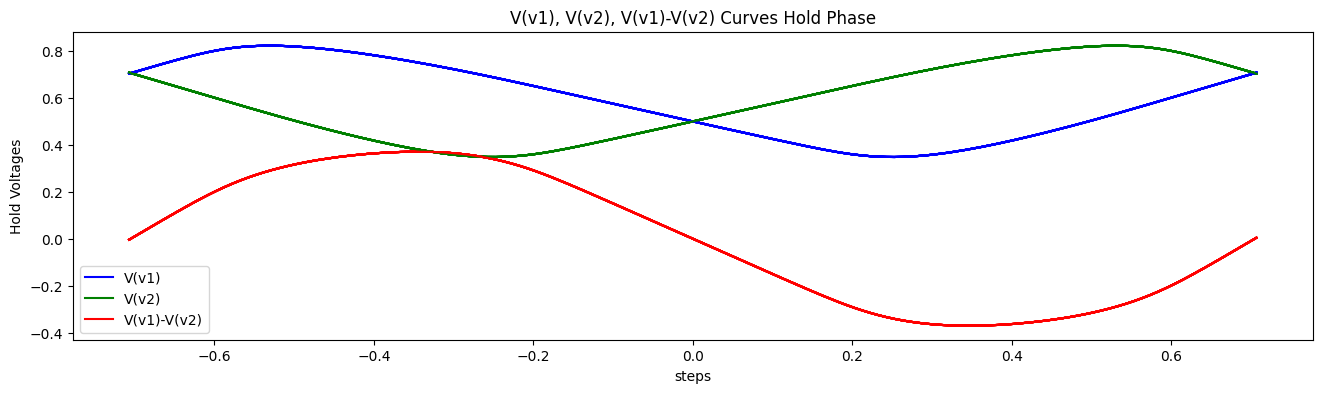

w_ax                           SNM_MAX(HOLD)                  SNM_MIN(HOLD)                 
1.2e-07 u                      261.875 mV                     -261.859 mV                   
1.3e-07 u                      261.875 mV                     -261.859 mV                   
1.4e-07 u                      261.875 mV                     -261.859 mV                   
1.5e-07 u                      261.875 mV                     -261.859 mV                   
1.6e-07 u                      261.875 mV                     -261.859 mV                   
1.7e-07 u                      261.875 mV                     -261.859 mV                   
1.8e-07 u                      261.875 mV                     -261.859 mV                   
1.9e-07 u                      261.875 mV                     -261.858 mV                   
2e-07 u                        261.875 mV                     -261.858 mV                   
2.1e-07 u                      261.874 mV                     -261.858

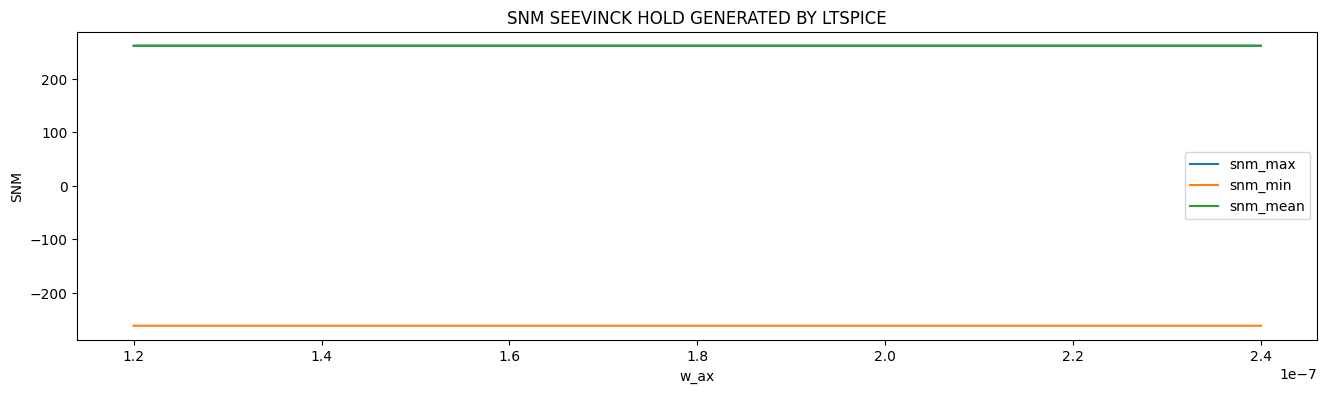

In [9]:
steps, vsweep_seevinck_hold, i_leaks_seevinck_hold, v_1_seevinck_hold, v_2_seevinck_hold, seevinck_hold_log = __init_model__(
    operation_type=OperationType.HOLD,
    circuit_type=CircuitType.SEEVINCK, 
    asc_file_path=os.path.join(ltspice, "seevinck/hold/seevinck_hold.asc"),
    schematic_image_path=os.path.join(schematics, "seevinck.png"),
    vdd=vdd_seevinck,
    vsweep=vsweep_seevinck,
    vwl=vwl_hold,
    vbl=vbl_hold,
    vblneg=vblneg_hold,
    params=[rit_models, dc_vsweep_seevinck, snm_max(0.707), snm_min(0.707), w_ax_step_param_seevinck, save_w_ax_seevinck]
)

plt.figure(figsize=(16, 4))
vq_seevinck_hold = []
vqneg_seevinck_hold = []
vq_vqneg_seevinck_hold = []
x_seevinck_hold = []
for step in range(len(steps)):
    vq = v_1_seevinck_hold.get_wave(step)
    vqneg = v_2_seevinck_hold.get_wave(step)
    vq_minus_vqneg = vq - vqneg
    vq_seevinck_hold.append(vq)
    vqneg_seevinck_hold.append(vqneg)
    vq_vqneg_seevinck_hold.append(vq_minus_vqneg)
    x = vsweep_seevinck_hold.get_wave(step)
    x_seevinck_hold.append(x)
    plt.plot(x, vq, label=steps[step], color='blue')
    plt.plot(x, vqneg, label=steps[step], color='green')
    plt.plot(x, vq_minus_vqneg, label=steps[step], color='red')
plt.title("V(v1), V(v2), V(v1)-V(v2) Curves Hold Phase")
plt.xlabel("steps"); plt.ylabel("Hold Voltages")
plt.legend(["V(v1)", "V(v2)", "V(v1)-V(v2)"])
save_image(image_path=os.path.join(images, "seevinck_hold_simulation.png"), plt=plt)
plt.show()


seevinck_hold_log_file_path = f"./{seevinck_hold_log}"
with open(seevinck_hold_log_file_path, "r") as file:
    content = file.read()

w_ax_seevinck_hold = get_data(pattern=w_ax_seevinck_pattern,  content=content)

snm_max_seevinck_hold = get_data(pattern=snm_max_seevinck_pattern, content=content)
snm_max_seevinck_hold = [1000 * value for value in snm_max_seevinck_hold]

snm_min_seevinck_hold = get_data(pattern=snm_min_seevinck_pattern, content=content)
snm_min_seevinck_hold = [1000 * value for value in snm_min_seevinck_hold]

print("{:<30} {:<30} {:<30}".format("w_ax", "SNM_MAX(HOLD)", "SNM_MIN(HOLD)"))
snm_mean_seevinck_hold = []
for w, smax, smin in zip(w_ax_seevinck_hold, snm_max_seevinck_hold, snm_min_seevinck_hold):
    smean = (smax + abs(smin)) / 2
    print("{:<30} {:<30} {:<30}".format(f'{w} u', f'{smax} mV', f'{smin} mV'))
    snm_mean_seevinck_hold.append(smean)
print(f'snm_seevinck_hold[{w_ax_seevinck_hold[w_ax_pos]} u] = {snm_max_seevinck_hold[w_ax_pos]}')

plt.figure(figsize=(16, 4))
plt.plot(w_ax_seevinck_hold, snm_max_seevinck_hold)
plt.plot(w_ax_seevinck_hold, snm_min_seevinck_hold)
plt.plot(w_ax_seevinck_hold, snm_mean_seevinck_hold)
plt.xlabel("w_ax"); plt.ylabel("SNM")
plt.legend(["snm_max","snm_min", "snm_mean"])
plt.title("SNM SEEVINCK HOLD GENERATED BY LTSPICE")
save_image(image_path=os.path.join(images, "snm_seevinck_hold_generated_by_ltspice.png"), plt=plt)
plt.show()

snm_seevinck_hold_seevinck_processing = 261.9149308688862
snm_seevinck_hold_standard_processing = 261.9878941702367
File updated successfully: ../../images/v1_minus_v2_seevinck_hold.png


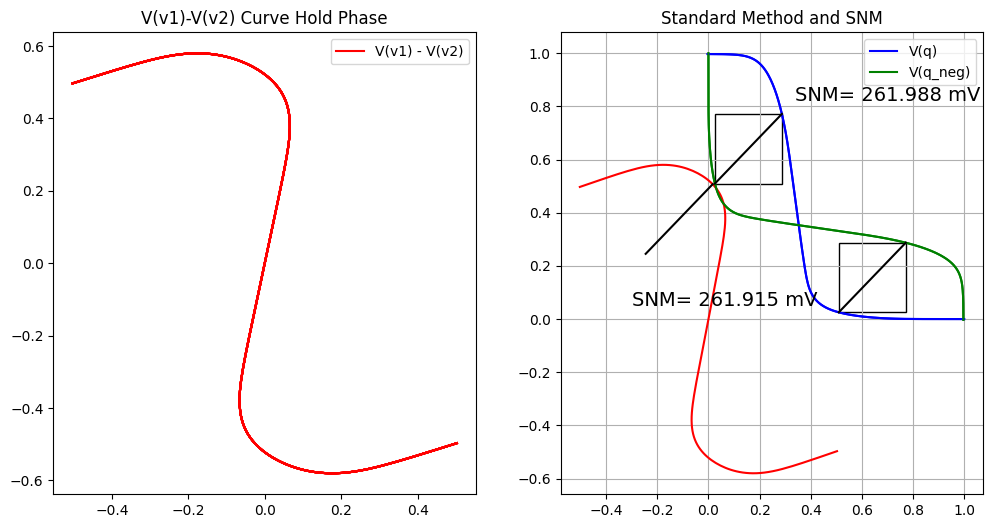

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# vq-vqneg rotating
for vq_array, vqneg_array in zip(vq_seevinck_hold, vqneg_seevinck_hold):
    vq_vqneg_array = vq_array - vqneg_array
    x_diff, y_diff = rotate_points(x=x_seevinck_hold[w_ax_pos], y=vq_vqneg_array, angle_degrees=-45)
    axs[0].plot(x_diff, y_diff, color='red')
axs[0].set_title("V(v1)-V(v2) Curve Hold Phase")
axs[0].legend(["V(v1) - V(v2)"])

# vq and vqneg rotating
xshold1, yshold1 = rotate_points(x=x_seevinck_hold[w_ax_pos], y=vq_seevinck_hold[w_ax_pos], angle_degrees=-45)
xshold2, yshold2 = rotate_points(x=x_seevinck_hold[w_ax_pos], y=vqneg_seevinck_hold[w_ax_pos], angle_degrees=-45)
axs[1].plot(xshold1, yshold1, color='blue')
axs[1].plot(xshold2, yshold2, color='green')

# seevinck processing
snm_seevinck_hold_seevinck_processing = seevinck_processing(
    x_v1_minus_v2=x_seevinck_hold[w_ax_pos], 
    v1_minus_v2=vq_vqneg_seevinck_hold[w_ax_pos], 
    ax=axs[1]
)
axs[1].set_title("V(v1)-V(v2) Curve Hold Phase and SNM")
print(f'snm_seevinck_hold_seevinck_processing = {snm_seevinck_hold_seevinck_processing}')

# graphical-processing
snm_seevinck_hold_standard_processing = graphical_processing(
    x_vq=xshold1, 
    vq=yshold1, 
    x_vqneg=xshold2, 
    vqneg=yshold2, 
    ax=axs[1]
)
axs[1].grid()
print(f'snm_seevinck_hold_standard_processing = {snm_seevinck_hold_standard_processing}')

save_image(image_path=os.path.join(images, "v1_minus_v2_seevinck_hold.png"), plt=plt)
plt.show()

<h3>Read Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/seevinck/read/seevinck_read.asc
Successful/Total Simulations: 0/1
Raw file: data\seevinck\read\seevinck_read_1.raw, Log file: data\seevinck\read\seevinck_read_1.log
File opened successfully: data\seevinck\read\seevinck_read_1.raw
File updated successfully: ../../images/seevinck_read_simulation.png


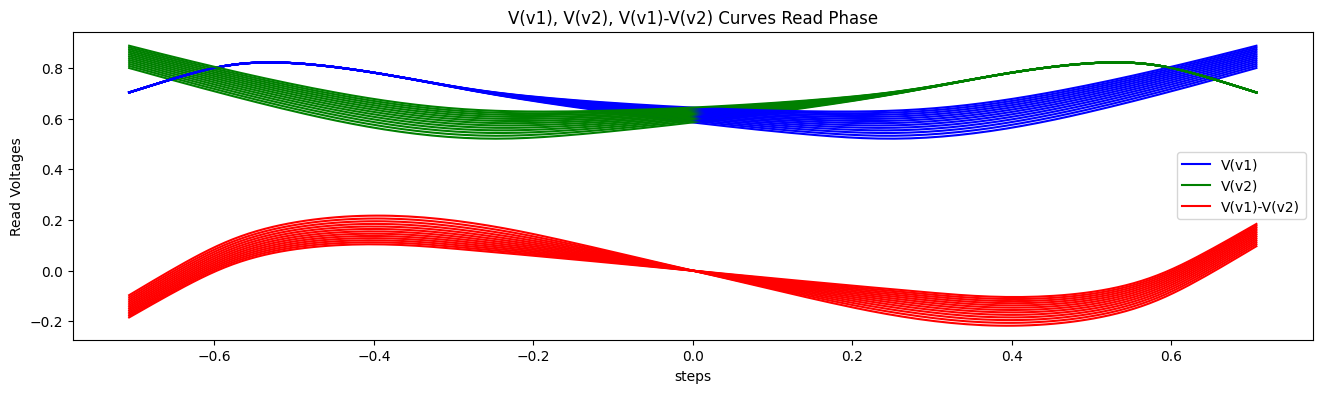

w_ax                 SNM_MAX(READ)                  SNM_MIN(READ)                 
1.2e-07 u            153.49699999999999 mV          -153.499 mV                   
1.3e-07 u            145.509 mV                     -145.491 mV                   
1.4e-07 u            137.816 mV                     -137.78199999999998 mV        
1.5e-07 u            130.39600000000002 mV          -130.373 mV                   
1.6e-07 u            123.232 mV                     -123.226 mV                   
1.7e-07 u            116.30699999999999 mV          -116.31700000000001 mV        
1.8e-07 u            109.608 mV                     -109.63000000000001 mV        
1.9e-07 u            106.27000000000001 mV          -106.27000000000001 mV        
2e-07 u              111.278 mV                     -111.278 mV                   
2.1e-07 u            116.19 mV                      -116.19 mV                    
2.2e-07 u            121.009 mV                     -121.009 mV                   
2.3e

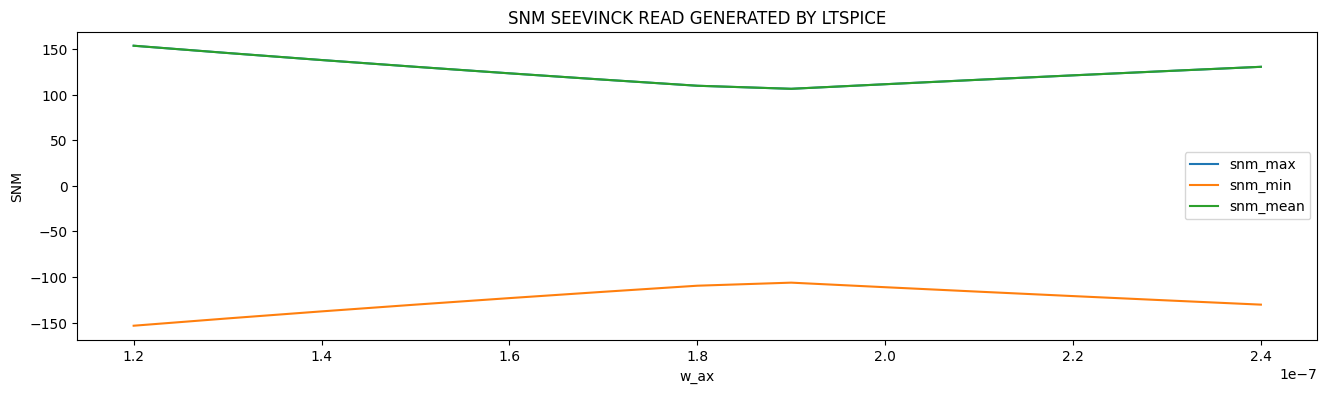

In [11]:
steps, vsweep_seevinck_read, i_leaks_seevinck_read, v_1_seevinck_read, v_2_seevinck_read, seevinck_read_log = __init_model__(
    operation_type=OperationType.READ,
    circuit_type=CircuitType.SEEVINCK, 
    asc_file_path=os.path.join(ltspice, "seevinck/read/seevinck_read.asc"),
    schematic_image_path=os.path.join(schematics, "seevinck.png"),
    vdd=vdd_seevinck,
    vsweep=vsweep_seevinck,
    vwl=vwl_read,
    vbl=vbl_read,
    vblneg=vblneg_read,
    params=[rit_models, dc_vsweep_seevinck, snm_max(0.707), snm_min(0.707), w_ax_step_param_seevinck, save_w_ax_seevinck]
)

plt.figure(figsize=(16, 4))
vq_seevinck_read = []
vqneg_seevinck_read = []
vq_vqneg_seevinck_read = []
x_seevinck_read = []
for step in range(len(steps)):
    vq = v_1_seevinck_read.get_wave(step)
    vqneg = v_2_seevinck_read.get_wave(step)
    vq_minus_vqneg = vq - vqneg
    vq_seevinck_read.append(vq)
    vqneg_seevinck_read.append(vqneg)
    vq_vqneg_seevinck_read.append(vq_minus_vqneg)
    x = vsweep_seevinck_read.get_wave(step)
    x_seevinck_read.append(x)
    plt.plot(x, vq, label=steps[step], color='blue')
    plt.plot(x, vqneg, label=steps[step], color='green')
    plt.plot(x, vq_minus_vqneg, label=steps[step], color='red')
plt.title("V(v1), V(v2), V(v1)-V(v2) Curves Read Phase")
plt.xlabel("steps"); plt.ylabel("Read Voltages")
plt.legend(["V(v1)", "V(v2)", "V(v1)-V(v2)"])
save_image(image_path=os.path.join(images, "seevinck_read_simulation.png"), plt=plt)
plt.show()


seevinck_read_log_file_path = f"./{seevinck_read_log}"
with open(seevinck_read_log_file_path, "r") as file:
    content = file.read()

w_ax_seevinck_read = get_data(pattern=w_ax_seevinck_pattern, content=content)

snm_max_seevinck_read = get_data(pattern=snm_max_seevinck_pattern, content=content)
snm_max_seevinck_read = [1000 * value for value in snm_max_seevinck_read]

snm_min_seevinck_read = get_data(pattern=snm_min_seevinck_pattern, content=content)
snm_min_seevinck_read = [1000 * value for value in snm_min_seevinck_read]

print("{:<20} {:<30} {:<30}".format("w_ax", "SNM_MAX(READ)", "SNM_MIN(READ)"))
snm_mean_seevinck_read = []
for w, smax, smin in zip(w_ax_seevinck_read, snm_max_seevinck_read, snm_min_seevinck_read):
    smean = (smax + abs(smin)) / 2
    print("{:<20} {:<30} {:<30}".format(f'{w} u', f'{smax} mV', f'{smin} mV'))
    snm_mean_seevinck_read.append(smean)
print(f'snm_seevinck_read[{w_ax_seevinck_read[w_ax_pos]} u] = {snm_max_seevinck_read[w_ax_pos]}')

plt.figure(figsize=(16, 4))
plt.plot(w_ax_seevinck_read, snm_max_seevinck_read)
plt.plot(w_ax_seevinck_read, snm_min_seevinck_read)
plt.plot(w_ax_seevinck_read, snm_mean_seevinck_read)
plt.xlabel("w_ax"); plt.ylabel("SNM")
plt.legend(["snm_max","snm_min", "snm_mean"])
plt.title("SNM SEEVINCK READ GENERATED BY LTSPICE")
save_image(image_path=os.path.join(images, "snm_seevinck_read_generated_by_ltspice.png"), plt=plt)
plt.show()

snm_seevinck_read_seevinck_processing = 145.53129774047963
snm_seevinck_read_standard_processing = 145.6016039856352
File updated successfully: ../../images/v1_minus_v2_seevinck_read.png


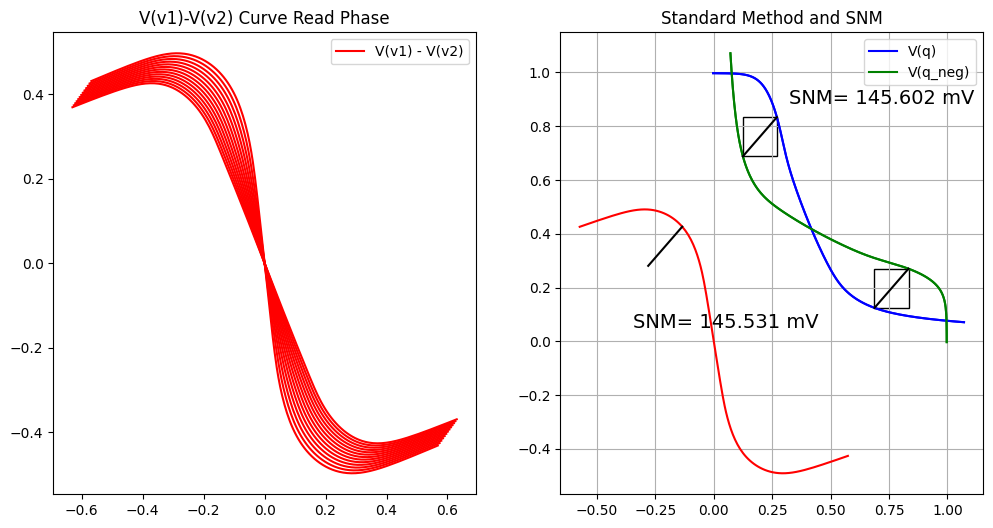

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# vq-vqneg rotating
for vq_array, vqneg_array in zip(vq_seevinck_read, vqneg_seevinck_read):
    vq_vqneg_array = vq_array - vqneg_array
    x_diff, y_diff = rotate_points(x=x_seevinck_read[w_ax_pos], y=vq_vqneg_array, angle_degrees=-45)
    axs[0].plot(x_diff, y_diff, color='red')
axs[0].set_title("V(v1)-V(v2) Curve Read Phase")
axs[0].legend(["V(v1) - V(v2)"])

# vq and vqneg rotating
xshold1, yshold1 = rotate_points(x=x_seevinck_read[w_ax_pos], y=vq_seevinck_read[w_ax_pos], angle_degrees=-45)
xshold2, yshold2 = rotate_points(x=x_seevinck_read[w_ax_pos], y=vqneg_seevinck_read[w_ax_pos], angle_degrees=-45)
axs[1].plot(xshold1, yshold1, color='blue')
axs[1].plot(xshold2, yshold2, color='green')

# seevinck processing
snm_seevinck_read_seevinck_processing = seevinck_processing(
    x_v1_minus_v2=x_seevinck_read[w_ax_pos], 
    v1_minus_v2=vq_vqneg_seevinck_read[w_ax_pos], 
    ax=axs[1]
)
axs[1].set_title("V(v1)-V(v2) Curve Read Phase and SNM")
print(f'snm_seevinck_read_seevinck_processing = {snm_seevinck_read_seevinck_processing}')

# graphical-processing
snm_seevinck_read_standard_processing = graphical_processing(
    x_vq=xshold1, 
    vq=yshold1, 
    x_vqneg=xshold2, 
    vqneg=yshold2, 
    ax=axs[1]
)
axs[1].grid()
print(f'snm_seevinck_read_standard_processing = {snm_seevinck_read_standard_processing}')

save_image(image_path=os.path.join(images, "v1_minus_v2_seevinck_read.png"), plt=plt)
plt.show()

<h2>Gaussian VTH DC Analysis</h2>

<h3>Hold Phase SRAM 6T</h3>

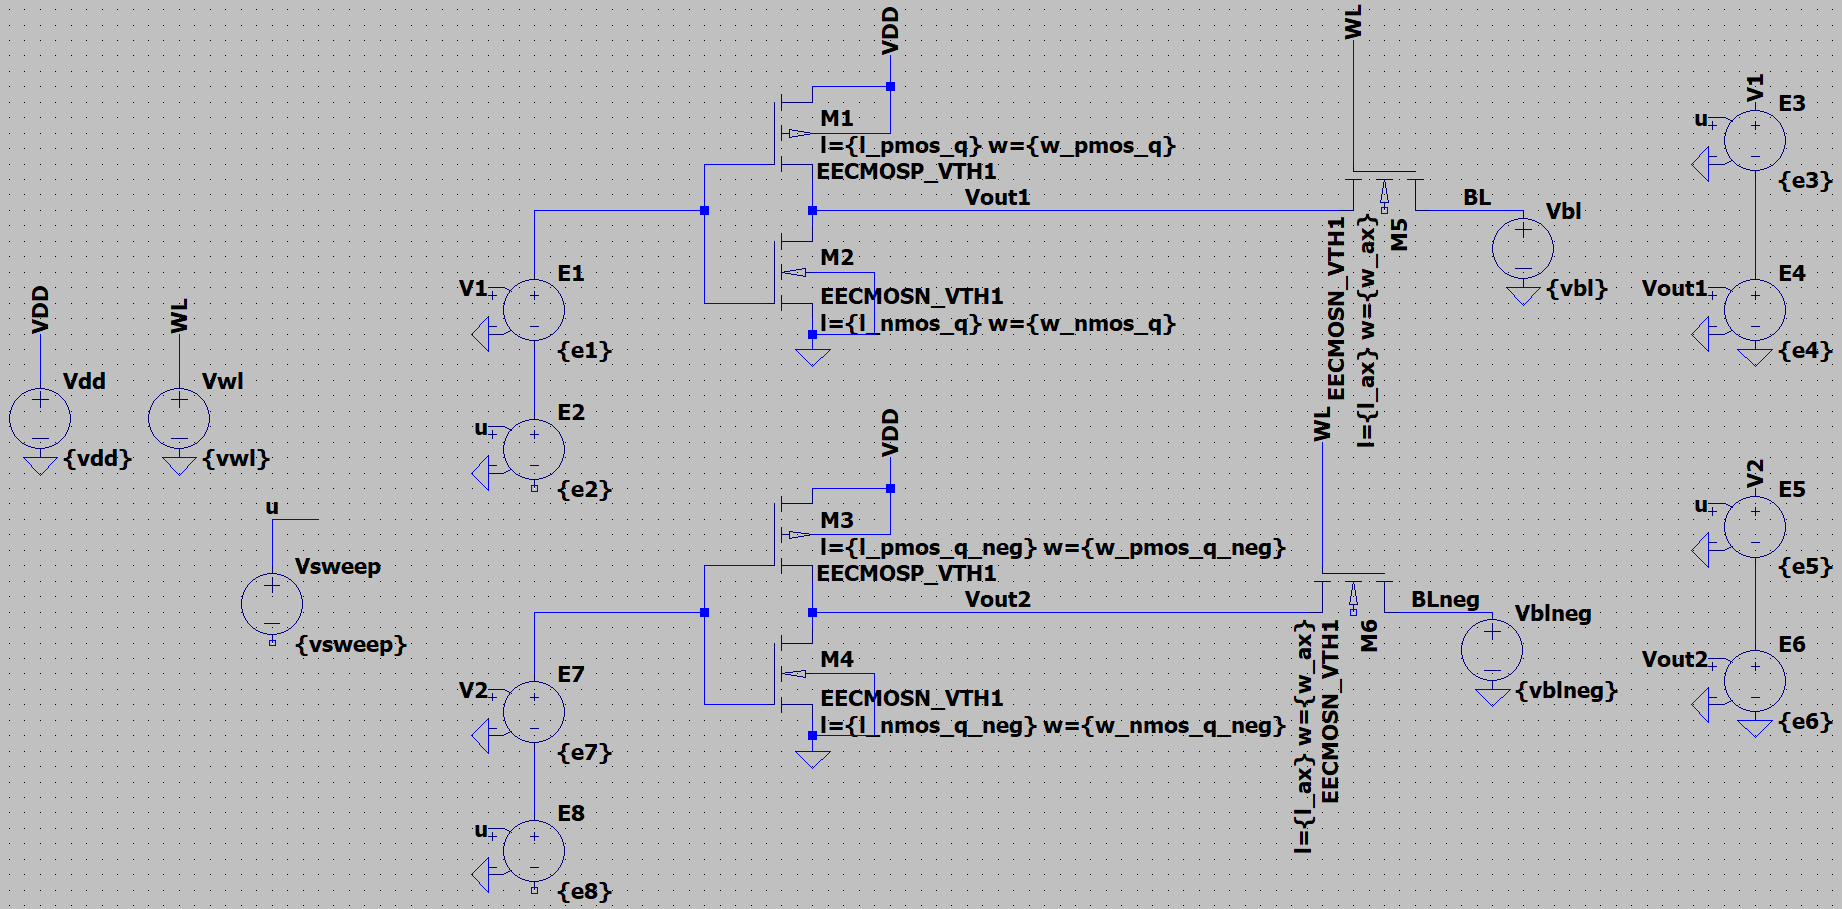

VDD Scaling Initialised
****************************************************************************************************************
vdd = 1.0 V
File opened successfully: ../../ltspice/models/gaussian-vth/hold/gaussian_vth_hold.asc
Successful/Total Simulations: 0/1
Raw file: data\gaussian-vth\hold\gaussian_vth_hold_1.raw, Log file: data\gaussian-vth\hold\gaussian_vth_hold_1.log
File opened successfully: data\gaussian-vth\hold\gaussian_vth_hold_1.raw
snm_mean_gaussian_vth_hold = 259.9041775 mV
snm_stdev_gaussian_vth_hold = 25.20835427689335 mV
****************************************************************************************************************
vdd = 0.95 V
File opened successfully: ../../ltspice/models/gaussian-vth/hold/gaussian_vth_hold.asc
Successful/Total Simulations: 0/1
Raw file: data\gaussian-vth\hold\gaussian_vth_hold_1.raw, Log file: data\gaussian-vth\hold\gaussian_vth_hold_1.log
File opened successfully: data\gaussian-vth\hold\gaussian_vth_hold_1.raw
snm_mean_gau

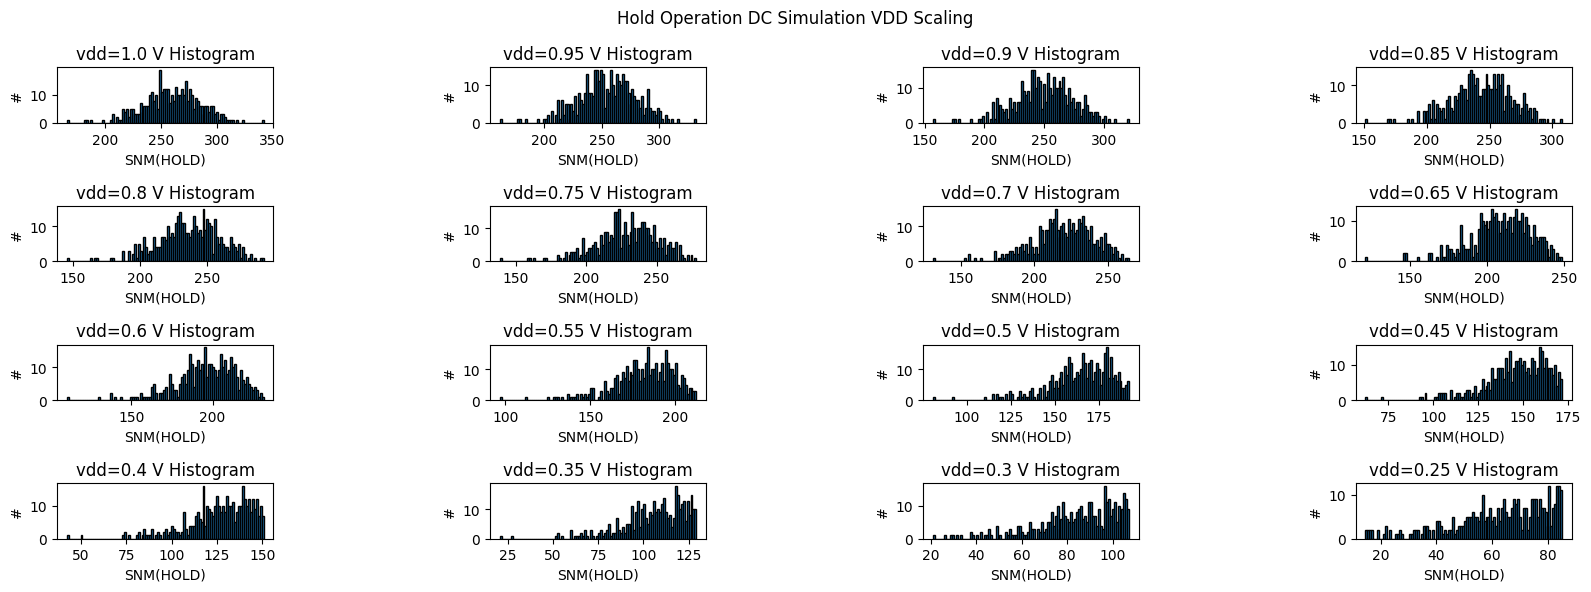

In [13]:
schematic_image_path=os.path.join(schematics, "gaussian_vth.png")
display(Image(schematic_image_path))

iterations_scaling = 16
rows = round(int(np.sqrt(iterations_scaling)))
tmp = iterations_scaling % rows
iterations = iterations_scaling
if tmp == 1:
    iterations = iterations_scaling + (rows-1)
elif tmp == 2:
    iterations = iterations_scaling + (rows-2)
cols = int(iterations / rows)
fig_hold_snm, axs_hold_snm = plt.subplots(rows, cols, figsize=(16, 6))
plt.suptitle("Hold Operation DC Simulation VDD Scaling")
vdd_start = 1.0
vdd_stop = vdd_start - (iterations / 10)
vdd_step = 0.05
print('VDD Scaling Initialised')
row = 0
col = 0
vdd_gaussian_vth_scaled = []
snm_gaussian_vth_hold_mean = []
snm_gaussian_vth_hold_stdev = []
for scaling in np.arange(vdd_start, vdd_stop, -vdd_step):
    if row == rows:
        break
    vdd_scaled = round(scaling, 2)
    vdd_gaussian_vth_scaled.append(vdd_scaled)
    print('****************************************************************************************************************')
    print(f'vdd = {vdd_scaled} V')
    steps, vsweep_gaussian_vth_hold, i_leaks_gaussian_vth_hold, v_1_gaussian_vth_hold, v_2_gaussian_vth_hold, gaussian_vth_hold_log = __init_model__(
        operation_type=OperationType.HOLD,
        circuit_type=CircuitType.GAUSSIAN_VTH_DC, 
        asc_file_path=os.path.join(ltspice, "gaussian-vth/hold/gaussian_vth_hold.asc"),
        schematic_image_path=os.path.join(schematics, "gaussian_vth.png"),
        vdd=f'{vdd_scaled}',
        vsweep=vsweep_gaussian_vth,
        vwl=vwl_hold,
        vbl=vbl_hold,
        vblneg=vblneg_hold,
        params=[rit_models_montecarlo, dc_vsweep_gaussian_vth(-0.707*scaling, 0.707*scaling, 0.01), step_param_run_gaussian_vth, snm_max(0.707), snm_min(0.707)]
    )
    
    vq_gaussian_vth_hold = []
    vqneg_gaussian_vth_hold = []
    vq_vqneg_gaussian_vth_hold = []
    x_gaussian_vth_hold = []
    
    
    for step in range(len(steps)):
        
        vq = v_1_gaussian_vth_hold.get_wave(step)
        vq_gaussian_vth_hold.append(vq)
        vqneg = v_2_gaussian_vth_hold.get_wave(step)
        vqneg_gaussian_vth_hold.append(vqneg)
        vq_minus_vqneg = vq - vqneg
        vq_vqneg_gaussian_vth_hold.append(vq_minus_vqneg)
        x = vsweep_gaussian_vth_hold.get_wave(step)
        x_gaussian_vth_hold.append(x)
        
        
    gaussian_vth_hold_log_file_path = f"./{gaussian_vth_hold_log}"
    with open(gaussian_vth_hold_log_file_path, "r") as file:
        content = file.read()
    
    snm_max_gaussian_vth_hold = get_data(pattern=snm_max_seevinck_pattern, content=content)
    snm_max_gaussian_vth_hold = [1000 * value for value in snm_max_gaussian_vth_hold]
     
    snm_min_gaussian_vth_hold = get_data(pattern=snm_min_seevinck_pattern, content=content)
    snm_min_gaussian_vth_hold = [abs(1000 * value) for value in snm_min_gaussian_vth_hold]
    
    snm_hold = []
    for snm_max_hold, snm_min_hold in zip(snm_max_gaussian_vth_hold, snm_min_gaussian_vth_hold):
        if snm_max_hold > snm_min_hold:
            snm_hold.append(snm_min_hold)
        else:
            snm_hold.append(snm_max_hold)
    
    axs_hold_snm[row, col].hist(snm_hold, bins=100, edgecolor='black')
    axs_hold_snm[row, col].set_xlabel("SNM(HOLD)")
    axs_hold_snm[row, col].set_ylabel("#")
    axs_hold_snm[row, col].set_title(f"vdd={vdd_scaled} V Histogram")
    
    snm_mean = mean(snm_hold)
    snm_stdev = stdev(snm_hold)
    snm_gaussian_vth_hold_mean.append(snm_mean)
    snm_gaussian_vth_hold_stdev.append(snm_stdev)
    print(f'snm_mean_gaussian_vth_hold = {snm_mean} mV')
    print(f'snm_stdev_gaussian_vth_hold = {snm_stdev} mV')
    
    
    if col == (cols-1):
        row = row + 1
        col = 0
    else:
        col = col + 1   

plt.tight_layout()
plt.subplots_adjust(hspace=1.5, wspace=1)
save_image(image_path=os.path.join(images, "hold_operation_dc_vdd_scaling.png"), plt=plt)
plt.show()

<h3>Read Phase SRAM 6T</h3>

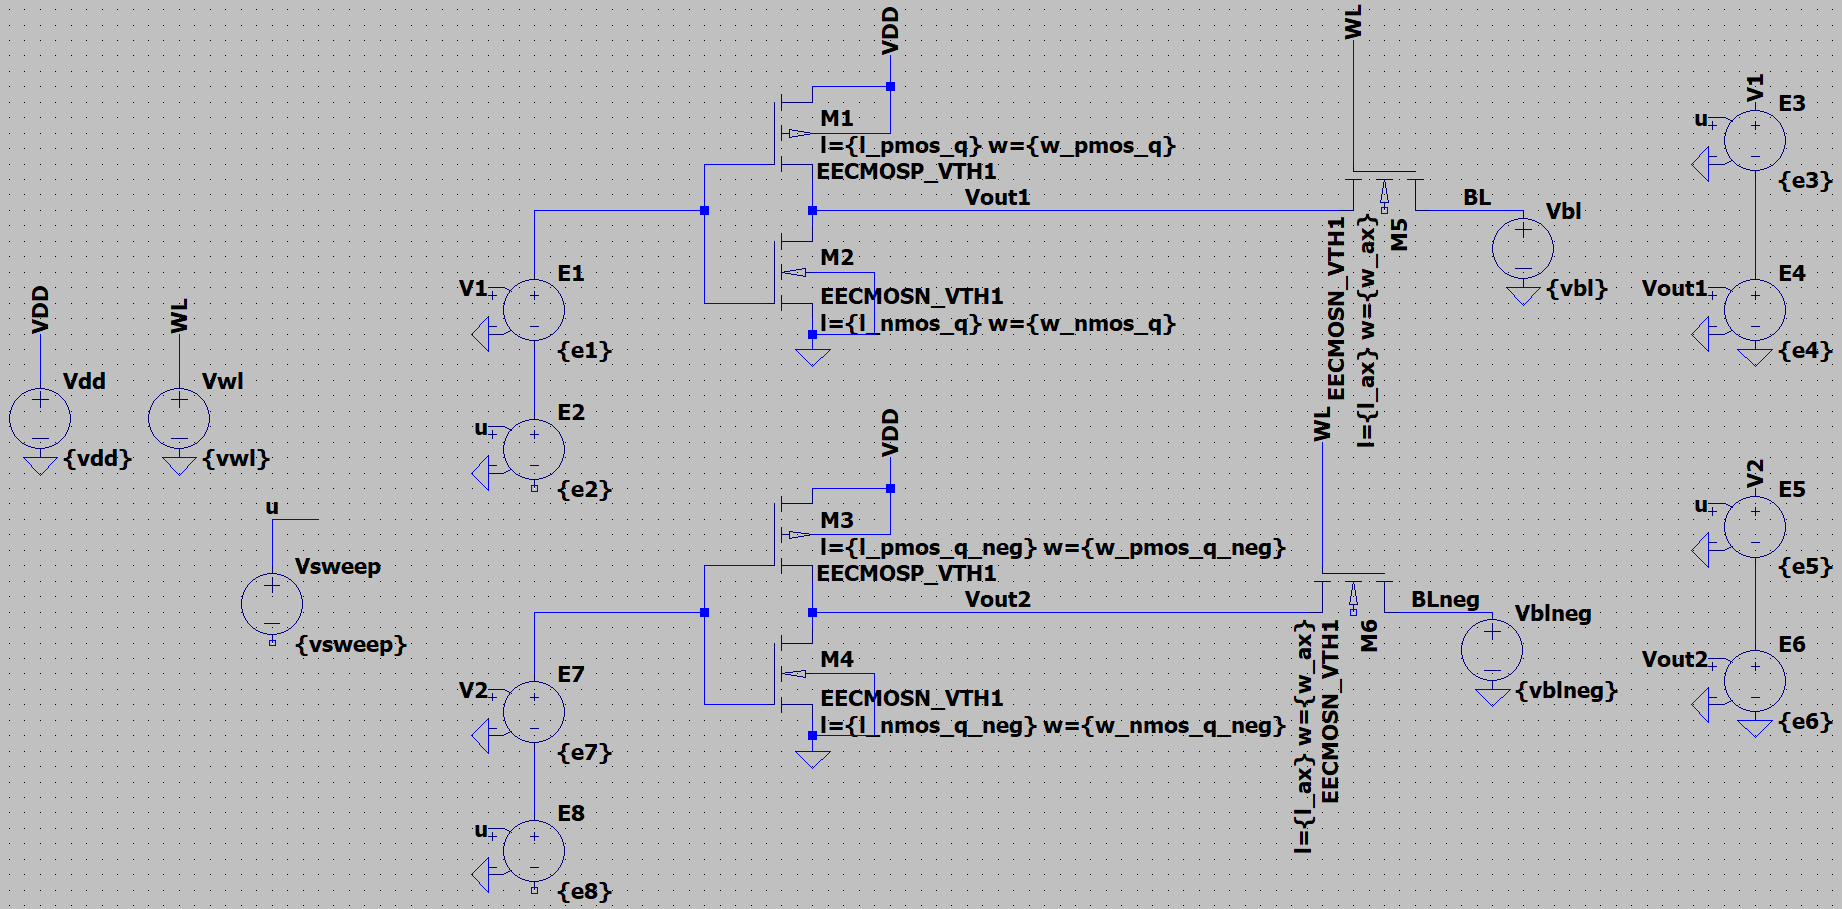

VDD Scaling Initialised
****************************************************************************************************************
vdd = 1.0 V
File opened successfully: ../../ltspice/models/gaussian-vth/read/gaussian_vth_read.asc
Successful/Total Simulations: 0/1
Raw file: data\gaussian-vth\read\gaussian_vth_read_1.raw, Log file: data\gaussian-vth\read\gaussian_vth_read_1.log
File opened successfully: data\gaussian-vth\read\gaussian_vth_read_1.raw
snm_mean_gaussian_vth_read = 143.85150625 mV
snm_stdev_gaussian_vth_read = 24.79038651959795 mV
****************************************************************************************************************
vdd = 0.95 V
File opened successfully: ../../ltspice/models/gaussian-vth/read/gaussian_vth_read.asc
Successful/Total Simulations: 0/1
Raw file: data\gaussian-vth\read\gaussian_vth_read_1.raw, Log file: data\gaussian-vth\read\gaussian_vth_read_1.log
File opened successfully: data\gaussian-vth\read\gaussian_vth_read_1.raw
snm_mean_ga

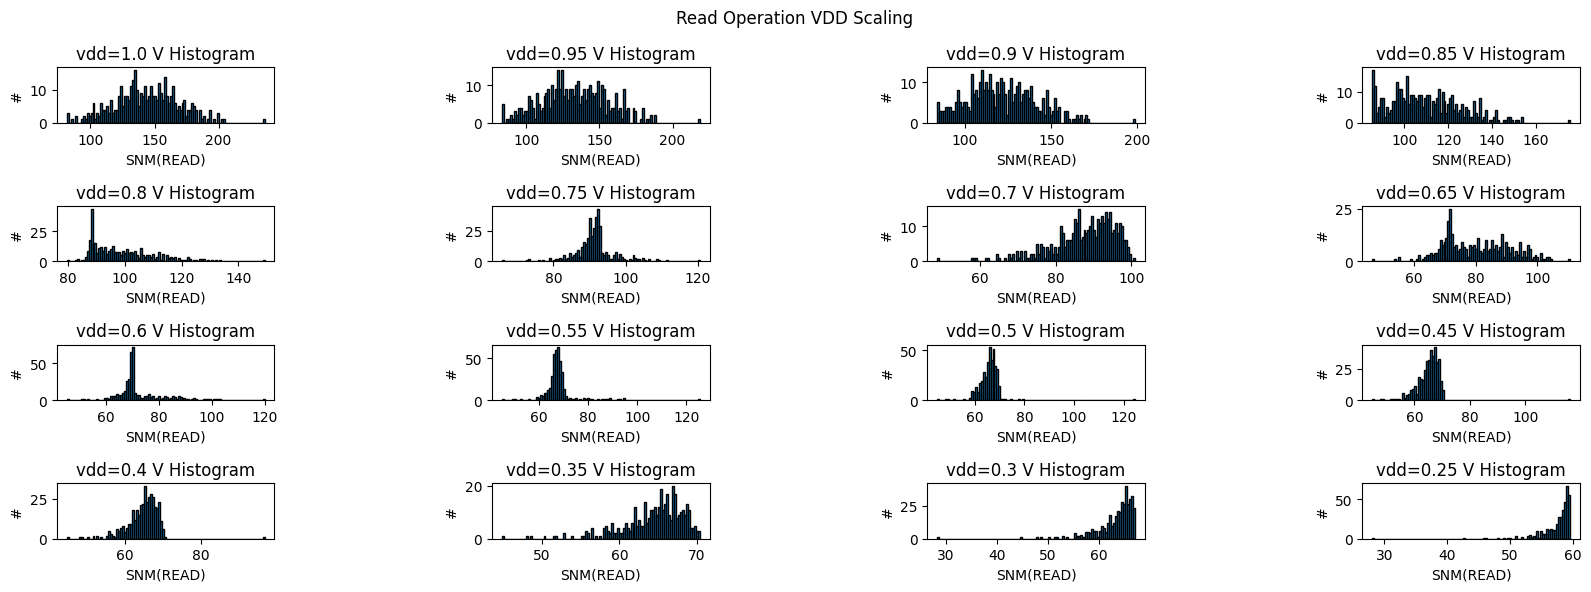

In [14]:
schematic_image_path=os.path.join(schematics, "gaussian_vth.png")
display(Image(schematic_image_path))

iterations_scaling = 16
rows = round(int(np.sqrt(iterations_scaling)))
tmp = iterations_scaling % rows
iterations = iterations_scaling
if tmp == 1:
    iterations = iterations_scaling + (rows-1)
elif tmp == 2:
    iterations = iterations_scaling + (rows-2)
cols = int(iterations / rows)
fig, axs = plt.subplots(rows, cols, figsize=(16, 6))
plt.suptitle("Read Operation VDD Scaling")
vdd_start = 1.0
vdd_stop = vdd_start - (iterations / 10)
vdd_step = 0.05
print('VDD Scaling Initialised')
row = 0
col = 0
vdd_gaussian_vth_scaled = []
snm_gaussian_vth_read_mean = []
snm_gaussian_vth_read_stdev = []
for scaling in np.arange(vdd_start, vdd_stop, -vdd_step):
    if row == rows:
        break
    vdd_scaled = round(scaling, 2)
    vdd_gaussian_vth_scaled.append(vdd_scaled)
    print('****************************************************************************************************************')
    print(f'vdd = {vdd_scaled} V')
    steps, vsweep_gaussian_vth_read, i_leaks_gaussian_vth_read, v_1_gaussian_vth_read, v_2_gaussian_vth_read, gaussian_vth_read_log = __init_model__(
        operation_type=OperationType.READ,
        circuit_type=CircuitType.GAUSSIAN_VTH_DC, 
        asc_file_path=os.path.join(ltspice, "gaussian-vth/read/gaussian_vth_read.asc"),
        schematic_image_path=os.path.join(schematics, "gaussian_vth.png"),
        vdd=f'{vdd_scaled}',
        vsweep=vsweep_gaussian_vth,
        vwl=vwl_read,
        vbl=vbl_read,
        vblneg=vblneg_read,
        params=[rit_models_montecarlo, dc_vsweep_gaussian_vth(-0.707*scaling, 0.707*scaling, 0.01), step_param_run_gaussian_vth, snm_max(0.707), snm_min(0.707)]
    )
    vq_gaussian_vth_read = []
    vqneg_gaussian_vth_read = []
    vq_vqneg_gaussian_vth_read = []
    x_gaussian_vth_read = []
    for step in range(len(steps)):
        vq = v_1_gaussian_vth_read.get_wave(step)
        vqneg = v_2_gaussian_vth_read.get_wave(step)
        vq_minus_vqneg = vq - vqneg
        vq_gaussian_vth_read.append(vq)
        vqneg_gaussian_vth_read.append(vqneg)
        vq_vqneg_gaussian_vth_read.append(vq_minus_vqneg)
        x = vsweep_gaussian_vth_read.get_wave(step)
        x_gaussian_vth_read.append(x)
        
    gaussian_vth_read_log_file_path = f"./{gaussian_vth_read_log}"
    with open(gaussian_vth_read_log_file_path, "r") as file:
        content = file.read()
    
    snm_max_gaussian_vth_read = get_data(pattern=snm_max_seevinck_pattern, content=content)
    snm_max_gaussian_vth_read = [1000 * value for value in snm_max_gaussian_vth_read]
    
    snm_min_gaussian_vth_read = get_data(pattern=snm_min_seevinck_pattern, content=content)
    snm_min_gaussian_vth_read = [abs(1000 * value) for value in snm_min_gaussian_vth_read]
    
    snm_read = []
    for snm_max_read, snm_min_read in zip(snm_max_gaussian_vth_read, snm_min_gaussian_vth_read):
        if snm_max_read > snm_min_read:
            snm_read.append(snm_min_read)
        else:
            snm_read.append(snm_max_read)
    
    axs[row, col].hist(snm_read, bins=100, edgecolor='black')
    axs[row, col].set_xlabel("SNM(READ)")
    axs[row, col].set_ylabel("#")
    axs[row, col].set_title(f"vdd={vdd_scaled} V Histogram")
    
    snm_mean = mean(snm_read)
    snm_stdev = stdev(snm_read)
    snm_gaussian_vth_read_mean.append(snm_mean)
    snm_gaussian_vth_read_stdev.append(snm_stdev)
    print(f'snm_mean_gaussian_vth_read = {snm_mean} mV')
    print(f'snm_stdev_gaussian_vth_read = {snm_stdev} mV')
    
    if col == (cols-1):
        row = row + 1
        col = 0
    else:
        col = col + 1   

plt.tight_layout()
plt.subplots_adjust(hspace=1.5, wspace=1)
save_image(image_path=os.path.join(images, "read_operation_dc_vdd_scaling.png"), plt=plt)
plt.show()

<h2>Gaussian VTH Transient Analysis</h2>

<h3>Hold Phase SRAM 6T</h3>

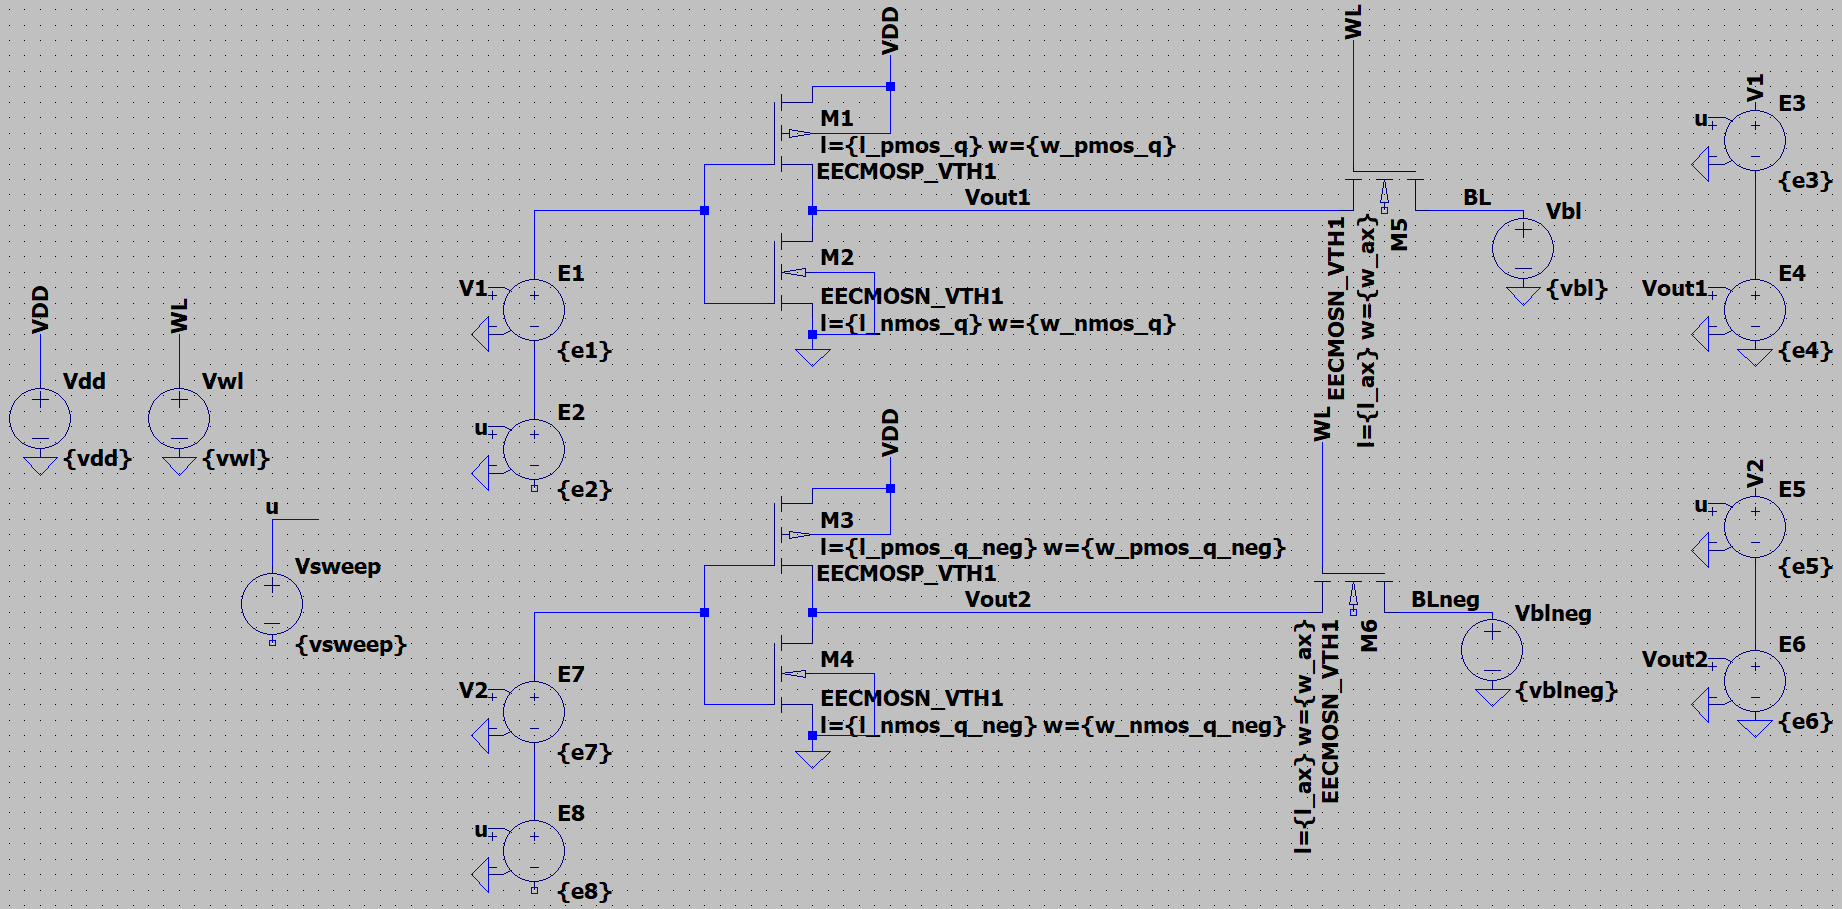

VDD Scaling Initialised
****************************************************************************************************************
vdd = 1.0 V
File opened successfully: ../../ltspice/models/gaussian-vth/hold/gaussian_vth_hold.asc
Successful/Total Simulations: 0/1
Raw file: data\gaussian-vth\hold\gaussian_vth_hold_1.raw, Log file: data\gaussian-vth\hold\gaussian_vth_hold_1.log
File opened successfully: data\gaussian-vth\hold\gaussian_vth_hold_1.raw
i_leak_mean_gaussian_vth_hold = 7.402111146248558e-10 A
i_leak_stdev_gaussian_vth_hold = 1.6778759445586582e-09 A
****************************************************************************************************************
vdd = 0.95 V
File opened successfully: ../../ltspice/models/gaussian-vth/hold/gaussian_vth_hold.asc
Successful/Total Simulations: 0/1
Raw file: data\gaussian-vth\hold\gaussian_vth_hold_1.raw, Log file: data\gaussian-vth\hold\gaussian_vth_hold_1.log
File opened successfully: data\gaussian-vth\hold\gaussian_vth_hold

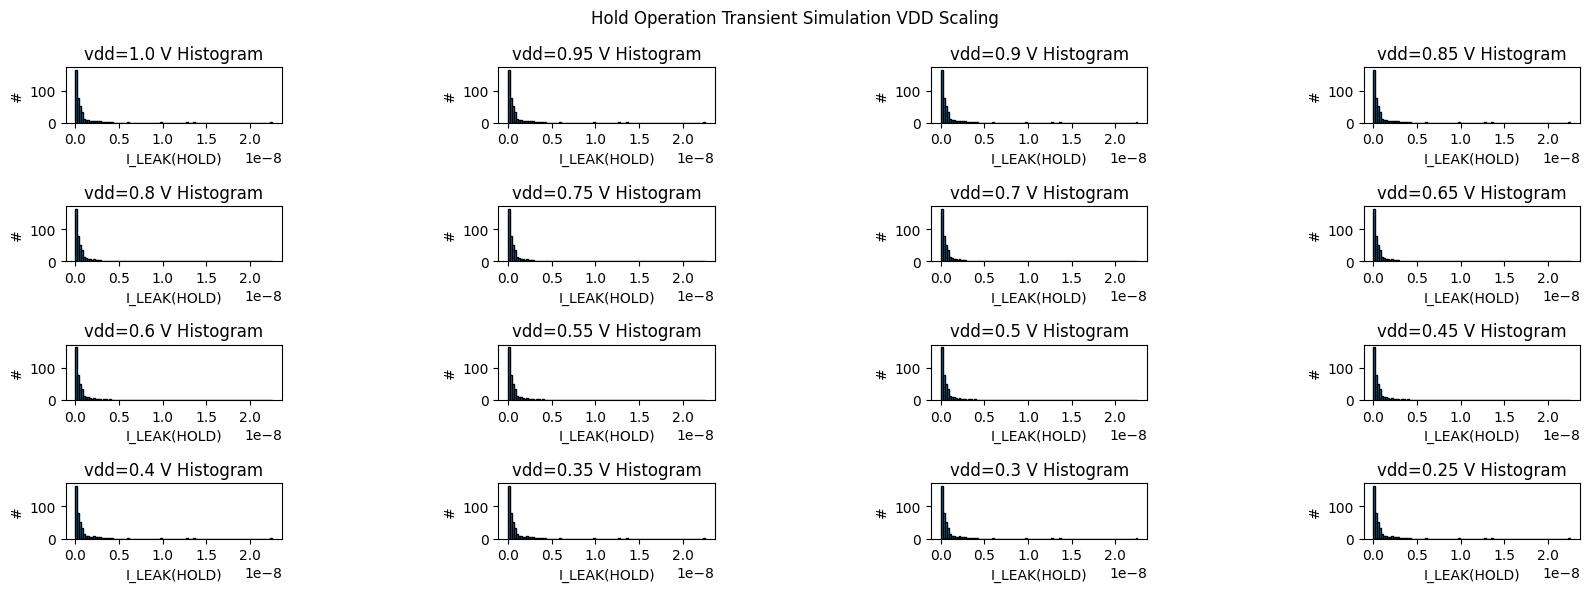

In [15]:
schematic_image_path=os.path.join(schematics, "gaussian_vth.png")
display(Image(schematic_image_path))

iterations_scaling = 16
rows = round(int(np.sqrt(iterations_scaling)))
tmp = iterations_scaling % rows
iterations = iterations_scaling
if tmp == 1:
    iterations = iterations_scaling + (rows-1)
elif tmp == 2:
    iterations = iterations_scaling + (rows-2)
cols = int(iterations / rows)
fig_hold_ileak, axs_hold_ileak = plt.subplots(rows, cols, figsize=(16, 6))
plt.suptitle("Hold Operation Transient Simulation VDD Scaling")
vdd_start = 1.0
vdd_stop = vdd_start - (iterations / 10)
vdd_step = 0.05
print('VDD Scaling Initialised')
row = 0
col = 0
vdd_gaussian_vth_scaled = []
i_leak_gaussian_vth_hold_mean = []
i_leak_gaussian_vth_hold_stdev = []
for scaling in np.arange(vdd_start, vdd_stop, -vdd_step):
    if row == rows:
        break
    vdd_scaled = round(scaling, 2)
    vdd_gaussian_vth_scaled.append(vdd_scaled)
    print('****************************************************************************************************************')
    print(f'vdd = {vdd_scaled} V')
    steps, vsweep_gaussian_vth_hold, i_leaks_gaussian_vth_hold, v_1_gaussian_vth_hold, v_2_gaussian_vth_hold, gaussian_vth_hold_log = __init_model__(
        operation_type=OperationType.HOLD,
        circuit_type=CircuitType.GAUSSIAN_VTH_TRANSIENT, 
        asc_file_path=os.path.join(ltspice, "gaussian-vth/hold/gaussian_vth_hold.asc"),
        schematic_image_path=os.path.join(schematics, "gaussian_vth.png"),
        vdd=f'{vdd_scaled}',
        vsweep=vsweep_gaussian_vth,
        vwl=vwl_hold,
        vbl=vbl_hold,
        vblneg=vblneg_hold,
        params=[rit_models_montecarlo, tran_gaussian_vth, step_param_run_gaussian_vth]
    )

    i_leak_ax_q = i_leaks_gaussian_vth_hold[0]
    i_leak_pu_q = i_leaks_gaussian_vth_hold[1]  
    i_leak_pd_qneg = i_leaks_gaussian_vth_hold[2]

    ileakaxq = []
    ileakpuq = []
    ileakpdqneg = []

    for step in range(len(steps)):

        ileakaxq_value = i_leak_ax_q.get_wave(step)
        ileakpuq_value = i_leak_pu_q.get_wave(step)
        ileakpdqneg_value = i_leak_pd_qneg.get_wave(step)

        ileakaxq.append(ileakaxq_value)
        ileakpuq.append(ileakpuq_value)
        ileakpdqneg.append(ileakpdqneg_value)


    i_leak_hold = [mean(value1)+mean(value2)+mean(value3) for value1, value2, value3 in zip(ileakaxq, ileakpuq, ileakpdqneg)]
    axs_hold_ileak[row, col].hist(i_leak_hold, bins=100, edgecolor='black')
    axs_hold_ileak[row, col].set_xlabel("I_LEAK(HOLD)")
    axs_hold_ileak[row, col].set_ylabel("#")
    axs_hold_ileak[row, col].set_title(f"vdd={vdd_scaled} V Histogram")

    i_leak_mean = mean(i_leak_hold)
    i_leak_stdev = stdev(i_leak_hold)
    i_leak_gaussian_vth_hold_mean.append(i_leak_mean)
    i_leak_gaussian_vth_hold_stdev.append(i_leak_stdev)
    print(f'i_leak_mean_gaussian_vth_hold = {i_leak_mean} A')
    print(f'i_leak_stdev_gaussian_vth_hold = {i_leak_stdev} A')


    if col == (cols-1):
        row = row + 1
        col = 0
    else:
        col = col + 1   

plt.tight_layout()
plt.subplots_adjust(hspace=1.5, wspace=1)
save_image(image_path=os.path.join(images, "read_operation_transient_vdd_scaling.png"), plt=plt)
plt.show()

<h2>Comparative Analysis</h2>

In [16]:
print("{:<10} {:<25} {:<25} {:<50}".format("VDD", "SNM(HOLD)", "SNM(READ)", "I_LEAK"))
for (
        vdd, 
        snm_hold_mean, 
        snm_hold_stdev, 
        snm_read_mean, 
        snm_read_stdev, 
        ileak_mean, 
        i_leak_stdev
) in zip(
    vdd_gaussian_vth_scaled, 
    snm_gaussian_vth_hold_mean, 
    snm_gaussian_vth_hold_stdev, 
    snm_gaussian_vth_read_mean,
    snm_gaussian_vth_read_stdev,
    i_leak_gaussian_vth_hold_mean,
    i_leak_gaussian_vth_hold_stdev
):
    vdd_str = f'{vdd} V'
    snm_hold_str = f'({round(snm_hold_mean,3)} mV, {round(snm_hold_stdev,3)} mV)'
    snm_read_str = f'({round(snm_read_mean,3)} mV, {round(snm_read_stdev,3)} mV)'
    ileak_str = f'({ileak_mean} A, {i_leak_stdev} A)'
    print("{:<10} {:<25} {:<25} {:<50}".format(vdd_str, snm_hold_str, snm_read_str, ileak_str))

VDD        SNM(HOLD)                 SNM(READ)                 I_LEAK                                            
1.0 V      (259.904 mV, 25.208 mV)   (143.852 mV, 24.79 mV)    (7.402111146248558e-10 A, 1.6778759445586582e-09 A)
0.95 V     (254.936 mV, 24.764 mV)   (133.092 mV, 22.76 mV)    (7.401530499606679e-10 A, 1.6778557490734063e-09 A)
0.9 V      (249.501 mV, 24.22 mV)    (121.658 mV, 19.963 mV)   (7.40101702145779e-10 A, 1.6778524482672612e-09 A)
0.85 V     (243.476 mV, 23.552 mV)   (110.029 mV, 16.155 mV)   (7.400515200650659e-10 A, 1.6778520163995935e-09 A)
0.8 V      (236.68 mV, 22.732 mV)    (99.082 mV, 11.135 mV)    (7.400014490066553e-10 A, 1.6778519025375388e-09 A)
0.75 V     (228.885 mV, 21.759 mV)   (91.338 mV, 5.616 mV)     (7.399514889705472e-10 A, 1.6778519228063577e-09 A)
0.7 V      (219.786 mV, 20.658 mV)   (87.466 mV, 8.426 mV)     (7.399014734232878e-10 A, 1.6778518920284912e-09 A)
0.65 V     (209.033 mV, 19.51 mV)    (80.224 mV, 10.675 mV)    (7.398514578760285e

File updated successfully: ../../images/comparative_analysis_vdd_scaling.png


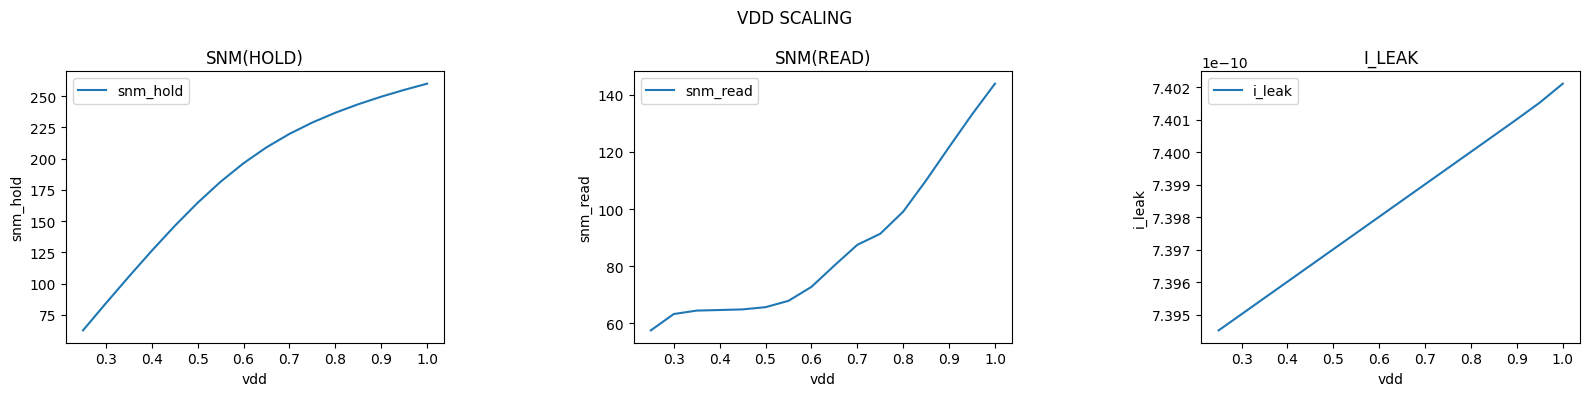

In [18]:
fig_table_1, axs_table_1 = plt.subplots(1, 3, figsize=(16, 4))
plt.suptitle("VDD SCALING")
axs_table_1[0].plot(vdd_gaussian_vth_scaled, snm_gaussian_vth_hold_mean)
axs_table_1[0].set_xlabel("vdd")
axs_table_1[0].set_ylabel("snm_hold")
axs_table_1[0].legend(["snm_hold"])
axs_table_1[0].set_title("SNM(HOLD)")
axs_table_1[1].plot(vdd_gaussian_vth_scaled, snm_gaussian_vth_read_mean)
axs_table_1[1].set_xlabel("vdd")
axs_table_1[1].set_ylabel("snm_read")
axs_table_1[1].legend(["snm_read"])
axs_table_1[1].set_title("SNM(READ)")
axs_table_1[2].plot(vdd_gaussian_vth_scaled, i_leak_gaussian_vth_hold_mean)
axs_table_1[2].set_xlabel("vdd")
axs_table_1[2].set_ylabel("i_leak")
axs_table_1[2].legend(["i_leak"])
axs_table_1[2].set_title("I_LEAK")
plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
save_image(image_path=os.path.join(images, "comparative_analysis_vdd_scaling.png"), plt=plt)
plt.show()

File updated successfully: ../../images/comparative_analysis_vdd_scaling.png


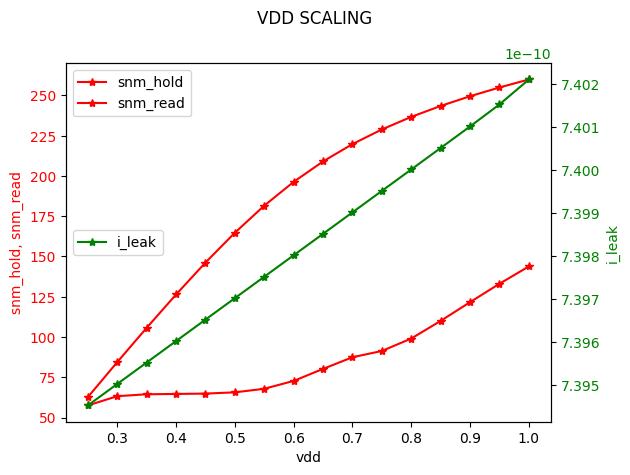

In [49]:
fig_table_2, axs_table_2_1 = plt.subplots(1, 1)
plt.suptitle("VDD SCALING")
axs_table_2_1.plot(vdd_gaussian_vth_scaled, snm_gaussian_vth_hold_mean, '-*',color='red')
axs_table_2_1.plot(vdd_gaussian_vth_scaled, snm_gaussian_vth_read_mean, '-*',color='red')
axs_table_2_1.set_xlabel("vdd")
axs_table_2_1.set_ylabel("snm_hold, snm_read", color='red')
axs_table_2_1.tick_params(axis='y', labelcolor='red')
axs_table_2_1.legend(["snm_hold", "snm_read"], loc='upper left')

axs_table_2_2 = axs_table_2_1.twinx()
axs_table_2_2.plot(vdd_gaussian_vth_scaled, i_leak_gaussian_vth_hold_mean, '-*',color='green')
axs_table_2_2.set_ylabel("i_leak", color='green')
axs_table_2_2.tick_params(axis='y', labelcolor='green')
axs_table_2_2.legend(["i_leak"], loc='center left')

fig_table_2.tight_layout()
save_image(image_path=os.path.join(images, "comparative_analysis_vdd_scaling.png"), plt=plt)
plt.show()